In [35]:
import numpy as np 
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [36]:
df=pd.read_csv('cases_train_preprocessed.csv')

/Users/timothywaikinlam/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [39]:
df.head()

,age,sex,latitude,longitude,date_confirmation,additional_information,outcome,age_range_ind,age_range,land,Last_Update,Confirmed,Deaths,Recovered,Active,Incidence_Rate,Case-Fatality_Ratio
0,47.0,Not Available,59.7294,13.2354,1.590822e+09,0,nonhospitalized,Missing,adult,True,2020-09-20 04:22:56,1241.0,73.0,0.0,1168.0,439.425808,5.882353
1,47.0,Not Available,35.2923,-2.9381,1.586934e+09,0,nonhospitalized,Missing,adult,True,2020-09-20 04:22:56,664.0,4.0,125.0,535.0,784.045153,0.602410
2,47.0,Not Available,55.9903,13.5958,1.587625e+09,0,nonhospitalized,Missing,adult,True,2020-09-20 04:22:56,5366.0,276.0,0.0,5090.0,389.453828,5.143496
3,47.0,Not Available,59.6025,18.1384,1.586848e+09,0,nonhospitalized,Missing,adult,True,2020-09-20 04:22:56,23739.0,2400.0,0.0,21339.0,998.661804,10.109946
4,47.0,Not Available,59.6714,16.2159,1.588057e+09,0,nonhospitalized,Missing,adult,True,2020-09-20 04:22:56,2854.0,183.0,0.0,2671.0,1034.639018,6.412053


In [ ]:
'''
train = pd.read_csv(r'../results/cases_train_preprocessed.csv',dtype=object)
test =  pd.read_csv(r'../results/cases_test_preprocessed.csv',dtype=object)
df_tr, df_te = train_test_split(train, test_size=0.2, random_state = 1)

## Split Data

In [37]:
def convertText(x):
    if x == '[]':
        return 0
    else:
        return 1
    
#df['source'] = df['source'].apply(convertText)
df['additional_information'] = df['additional_information'].apply(convertText)

In [4]:
df['additional_information']

0         0
1         0
2         0
3         0
4         0
         ..
366595    0
366596    0
366597    0
366598    0
366599    1
Name: additional_information, Length: 366600, dtype: int64

In [38]:
df=df.drop(columns=['province', 'country','source'])

In [40]:
for col in df.dtypes[df.dtypes == "object"].index:
    for_dummy = df.pop(col)
    df = pd.concat([df, pd.get_dummies(for_dummy, prefix=col)], axis=1)
df.head()

,age,latitude,longitude,date_confirmation,additional_information,land,Confirmed,Deaths,Recovered,Active,...,outcome_recovered,age_range_ind_False,age_range_ind_Missing,age_range_ind_True,age_range_adult,age_range_baby,age_range_child,age_range_senior,Last_Update_2020-09-20 04:22:56,Last_Update_9/20/2020 4:22:56 AM
0,47.0,59.7294,13.2354,1.590822e+09,0,True,1241.0,73.0,0.0,1168.0,...,0,0,1,0,1,0,0,0,1,0
1,47.0,35.2923,-2.9381,1.586934e+09,0,True,664.0,4.0,125.0,535.0,...,0,0,1,0,1,0,0,0,1,0
2,47.0,55.9903,13.5958,1.587625e+09,0,True,5366.0,276.0,0.0,5090.0,...,0,0,1,0,1,0,0,0,1,0
3,47.0,59.6025,18.1384,1.586848e+09,0,True,23739.0,2400.0,0.0,21339.0,...,0,0,1,0,1,0,0,0,1,0
4,47.0,59.6714,16.2159,1.588057e+09,0,True,2854.0,183.0,0.0,2671.0,...,0,0,1,0,1,0,0,0,1,0


In [41]:
labels = df.pop("outcome_deceased")
print(labels)

0         0
1         0
2         0
3         0
4         0
         ..
366595    0
366596    0
366597    0
366598    0
366599    0
Name: outcome_deceased, Length: 366600, dtype: uint8


In [42]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df, labels, test_size=0.20)

In [43]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [44]:
print(rf.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [45]:
y_pred = rf.predict(x_test)

In [46]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9967880085653105

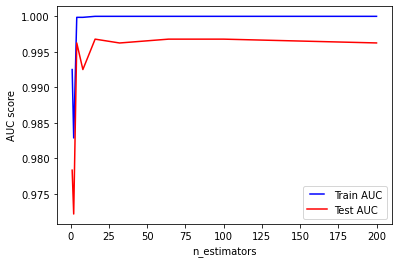

In [47]:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
train_results = []
test_results = []

for estimator in n_estimators:
   rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1)
   rf.fit(x_train, y_train)
   train_pred = rf.predict(x_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(x_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)


from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, "b", label="Train AUC")
line2, = plt.plot(n_estimators, test_results, "r", label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("n_estimators")
plt.show()